<a href="https://colab.research.google.com/github/GabrielCdev/life_expectancy_analysis/blob/main/Life_Expectancy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 3

##Life Expectancy (World Health Organization - WHO)

Base para a atividade: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

###....:::: Membros ::::....
Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protasio

##Objetivo:

Gerar um modelo de regressão com o objetivo de responder as seguintes perguntas:

- Quais são as variáveis que realmente afetam a expectativa de vida?
- Um país com expectativa de vida menor (<65) deve aumentar seus investimentos em saúde a fim de melhorar sua expectativa de vida média?
- Como as taxas de mortalidade infantil e de adultos afetam a expectativa de vida?
- A expectativa de vida tem correlação positiva ou negativa com hábitos alimentares, estilo de vida, exercícios, fumo, consumo de álcool etc.
- Qual é o impacto da escolaridade na expectativa de vida dos humanos?
- A expectativa de vida tem uma relação positiva ou negativa com o consumo de álcool?
- Países densamente povoados tendem a ter menor expectativa de vida?
- Qual é o impacto da cobertura de imunização na expectativa de vida?

## Descrição das colunas

Country: País;

Year: Ano;

Status: Desenvolvido ou em desenvolvimento;

Life expectancy: Expectativa de vida em anos;

Adult Mortality: Taxas de mortalidade adulta de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes);

Infant deaths: Número de óbitos infantis por 1000 habitantes;

Alcohol: Álcool, consumo registrado per capita (15+) (em litros de álcool puro);

Percentage expenditure: Gastos com saúde como porcentagem do PIB per capita (%)

Hepatitis B: Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano (%);

Measles: Sarampo - número de casos notificados por 1000 habitantes;

BMI: IMC médio de toda a população;

Under-five deaths: Número de mortes de menores de cinco anos por 1000 habitantes;

Polio: Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%);

Total expenditure: Gastos do governo geral com saúde como porcentagem do gasto total do governo (%);

Diphtheria: Cobertura vacinal contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano de idade (%);

HIV/AIDS: Mortes por 1000 nascidos vivos HIV/AIDS (0-4 anos);

GDP: PIB per capita (em USD);

Population: População do país;

*Thinness 1-19 years: Desnutrição em crianças e adolescentes de 10 a 19 anos (%);

Thinness 5-9 years: Desnutrição em crianças de 5 a 9 anos (%);

Income composition of resources: IDH em termos de composição de renda dos recursos (índice variando de 0 a 1);

Schooling: Número de anos de escolaridade


#Importação das bibliotecas necessárias

In [ ]:
# Bibliotecas Principais
import numpy as np
import pandas as pd

import seaborn as sns; 
import matplotlib.pyplot as plt

from scipy.stats import boxcox
from scipy.stats import shapiro

from sklearn import metrics
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.preprocessing import StandardScaler

#Importação dos dados

In [ ]:
# Importação do dataset
who_df = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/life_expectancy_analysis/main/dataset/Life_Expectancy_Data.csv')

#Configuração da visualização dos dados

In [ ]:
# Visualizar todas as colunas do dataframe
pd.set_option('display.max_columns', None)

#Visualização dos dados

In [ ]:
who_df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
who_df.tail(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
who_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#Renomeando as colunas do dataset

In [ ]:
who_df = who_df.rename(columns={
  "Country": "País",
  "Year": "Ano",
  "Life expectancy ": "Expectativa de vida",
  "Adult Mortality": "Mortalidade adulta",
  "infant deaths": "Mortalidade infantil",
  "Alcohol": "Consumo de álcool",
  "percentage expenditure": "Despesas com saúde em % do PIB",
  "Hepatitis B": "Hepatite B",
  "Measles ": "Sarampo",
  " BMI ": "IMC",
  "under-five deaths ": "Mortes de crianças menores de 5 anos",
  "Polio": "Poliomielite",
  "Total expenditure": "Despesas totais em saúde",
  "Diphtheria ": "Difteria",
  " HIV/AIDS": "HIV/AIDS",
  "GDP": "PIB",
  "Population": "População",
  " thinness  1-19 years": "Desnutrição 10-19 anos",
  " thinness 5-9 years": "Desnutrição 5-9 anos",
  "Income composition of resources": "Índice de composição de recursos",
  "Schooling": "Anos de escolaridade"
})

# Remoção de colunas

In [ ]:
who_df[['Mortalidade infantil', 'Mortes de crianças menores de 5 anos']].corr()

,Mortalidade infantil,Mortes de crianças menores de 5 anos
Mortalidade infantil,1.000000,0.996629
Mortes de crianças menores de 5 anos,0.996629,1.000000


In [ ]:
who_df.drop(columns=['Mortes de crianças menores de 5 anos'], inplace=True)

Pela leitura da descrição das variáveis e análise da correlação a coluna "Morte de crianaças menores de 5 anos" refletia os mesmos dados que a coluna "Mortalidade infantil", por isso foi retirada da análise.

# Distribuição dos valores únicos nos atributos País e Ano

Para obtermos uma ideia da distribuição dos valores nas colunas País e Ano do dataframe e quais valores são mais comuns do que outros.

In [ ]:
for c in ["País", "Ano"]:
  print ("---- %s ---" % c)
  print (who_df[c].value_counts())

---- País ---
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: País, Length: 193, dtype: int64
---- Ano ---
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Ano, dtype: int64


#Reorganização do dataset

Após visualização do dataframe, de acordo com os objetivos/questionamentos propostos, optamos por direcionar a visualização dos dados para anos a partir de 2013, pois, era o "menor ano" com a maior concentração de dados.

Ademais, a filtragem visa também concentrar as informações em anos mais próximos, onde a possibilidade de discrepância de dados e épocas, referente a avanços tecnológicos, na saúde etc, possam ter a influência controlada durante a análise.

In [ ]:
who_df = who_df[who_df["Ano"] >= 2013]

In [ ]:
who_df['Ano'].unique()

array([2015, 2014, 2013])

In [ ]:
who_df

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,Zambia,2014,Developing,61.1,314.0,28,0.01,196.667577,86.0,9,22.8,78.0,4.99,86.0,4.3,1738.882200,1562974.0,6.3,6.2,0.570,12.5
2908,Zambia,2013,Developing,63.0,328.0,29,2.41,20.623063,79.0,35,22.3,74.0,4.99,79.0,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,31.8,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,31.3,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3


#Estatística descritiva

In [ ]:
who_df.describe()

,Ano,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
count,559.000000,549.000000,549.000000,559.000000,379.000000,559.000000,529.000000,559.000000,551.000000,559.000000,374.000000,559.000000,559.000000,469.000000,4.280000e+02,551.000000,551.000000,522.000000,526.000000
mean,2013.982111,71.463206,150.105647,24.107335,3.632401,617.629124,82.899811,1593.892665,41.967695,84.200358,6.299679,84.996422,0.696601,8450.708552,1.482722e+07,4.511978,4.557169,0.688577,12.832319
std,0.820679,8.354401,103.332712,86.145700,4.172254,2068.848701,23.709163,8123.120450,21.120666,22.824543,2.793366,21.689648,1.438976,15714.531699,6.862034e+07,4.140171,4.178732,0.152863,2.986181
min,2013.000000,48.100000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,3.000000,1.120000,2.000000,0.100000,12.277330,4.100000e+01,0.100000,0.100000,0.341000,0.000000
25%,2013.000000,65.700000,69.000000,0.000000,0.010000,0.000000,79.000000,0.000000,23.400000,82.000000,4.482500,83.000000,0.100000,688.617279,2.867595e+05,1.500000,1.400000,0.565000,10.800000
50%,2014.000000,73.600000,137.000000,2.000000,1.570000,11.838532,93.000000,11.000000,48.400000,94.000000,5.930000,94.000000,0.100000,2878.338370,1.647190e+06,3.300000,3.300000,0.721500,13.000000
75%,2015.000000,76.800000,217.000000,17.000000,7.305000,287.954029,97.000000,221.000000,61.100000,98.000000,7.825000,97.000000,0.400000,7853.335191,9.529547e+06,6.550000,6.500000,0.796000,14.900000
max,2015.000000,89.000000,522.000000,1000.000000,15.190000,19479.911610,99.000000,90387.000000,87.300000,99.000000,17.240000,99.000000,9.800000,119172.741800,1.293859e+09,26.800000,27.500000,0.948000,20.400000


#Atributos nulos

In [ ]:
who_df.isna().sum()

País                                  0
Ano                                   0
Status                                0
Expectativa de vida                  10
Mortalidade adulta                   10
Mortalidade infantil                  0
Consumo de álcool                   180
Despesas com saúde em % do PIB        0
Hepatite B                           30
Sarampo                               0
IMC                                   8
Poliomielite                          0
Despesas totais em saúde            185
Difteria                              0
HIV/AIDS                              0
PIB                                  90
População                           131
Desnutrição 10-19 anos                8
Desnutrição 5-9 anos                  8
Índice de composição de recursos     37
Anos de escolaridade                 33
dtype: int64

##Visualização dos dados nulos

In [ ]:
# Expectativa de vida
who_df.loc[who_df['Expectativa de vida'].isnull()]

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,58.4,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,81.6,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,NaN,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,87.3,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,77.3,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,83.3,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,5.2,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,NaN,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,79.3,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [ ]:
who_df.loc[who_df['Consumo de álcool'].isnull()]

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,59.5,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,23.3,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,47.7,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,62.8,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,54.9,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,62.1,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,17.5,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,23.4,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [ ]:
who_df.loc[who_df['Hepatite B'].isnull()]

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
737,Denmark,2015,Developed,86.0,71.0,0,NaN,0.000000,NaN,9,58.8,93.0,NaN,93.0,0.1,5314.644160,5683483.0,1.1,0.9,0.923,19.2
738,Denmark,2014,Developed,84.0,73.0,0,9.64,10468.762920,NaN,27,58.4,94.0,1.80,94.0,0.1,62425.539200,5643475.0,1.1,0.9,0.926,19.2
739,Denmark,2013,Developed,81.0,75.0,0,9.50,10261.763000,NaN,17,58.1,94.0,11.25,94.0,0.1,61191.192630,5614932.0,1.1,0.9,0.924,18.7
836,Equatorial Guinea,2013,Developing,57.4,327.0,3,10.72,156.390769,NaN,321,23.5,3.0,3.73,3.0,5.7,2246.993800,183746.0,8.6,8.6,0.586,9.2
914,Finland,2015,Developing,81.1,76.0,0,NaN,0.000000,NaN,2,62.1,97.0,NaN,97.0,0.1,4245.397440,5479531.0,0.9,0.8,0.893,17.0
915,Finland,2014,Developing,89.0,78.0,0,8.80,6164.455402,NaN,0,61.7,98.0,9.68,98.0,0.1,49914.618640,5461512.0,0.9,0.8,0.890,17.0
916,Finland,2013,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,61.4,98.0,9.55,98.0,0.1,49638.771300,5438972.0,0.9,0.8,0.887,17.0
1154,Hungary,2015,Developed,75.8,134.0,0,NaN,0.000000,NaN,0,64.8,99.0,NaN,99.0,0.1,12365.626300,984328.0,1.6,1.6,0.834,15.6
1155,Hungary,2014,Developed,75.6,137.0,0,0.01,160.944934,NaN,0,64.2,99.0,7.40,99.0,0.1,14117.976680,9866468.0,1.7,1.6,0.834,15.8
1156,Hungary,2013,Developed,75.5,139.0,0,10.88,155.195208,NaN,1,63.6,99.0,7.53,99.0,0.1,13613.614700,989382.0,1.7,1.7,0.824,15.4


In [ ]:
who_df.loc[who_df['Despesas totais em saúde'].isnull()]

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,59.5,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,23.3,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,47.7,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,62.8,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,54.9,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,62.1,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,17.5,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,23.4,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [ ]:
who_df.loc[who_df['PIB'].isnull()]

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,64.5,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
161,Bahamas,2014,Developing,75.4,16.0,0,9.45,0.0,96.0,0,63.8,96.0,7.74,96.0,0.1,NaN,NaN,2.5,2.5,0.789,12.6
162,Bahamas,2013,Developing,74.8,172.0,0,9.42,0.0,97.0,0,63.2,97.0,7.50,97.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
304,Bolivia (Plurinational State of),2015,Developing,77.0,186.0,8,NaN,0.0,99.0,0,52.6,99.0,NaN,99.0,0.1,NaN,NaN,1.2,1.1,0.671,13.8
305,Bolivia (Plurinational State of),2014,Developing,74.0,189.0,8,3.62,0.0,98.0,0,51.9,99.0,6.33,98.0,0.1,NaN,NaN,1.2,1.1,0.666,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,Viet Nam,2014,Developing,75.9,128.0,28,4.09,0.0,95.0,15033,16.7,96.0,7.70,95.0,0.1,NaN,NaN,14.3,14.7,0.675,12.5
2876,Viet Nam,2013,Developing,75.7,129.0,28,4.00,0.0,59.0,1123,16.0,93.0,7.17,59.0,0.1,NaN,NaN,14.3,14.9,0.668,12.3
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2891,Yemen,2014,Developing,65.4,228.0,37,0.01,0.0,73.0,815,4.4,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0


In [ ]:
who_df.loc[who_df['População'].isnull()]

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,86.0,NaN,99.0,0.2,13566.95410,NaN,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,47.0,96.0,5.54,99.0,0.2,12888.29667,NaN,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,46.4,98.0,5.33,99.0,0.2,12224.86416,NaN,3.3,3.3,0.781,13.9
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.000000,95.0,0,64.5,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
161,Bahamas,2014,Developing,75.4,16.0,0,9.45,0.000000,96.0,0,63.8,96.0,7.74,96.0,0.1,NaN,NaN,2.5,2.5,0.789,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,Viet Nam,2014,Developing,75.9,128.0,28,4.09,0.000000,95.0,15033,16.7,96.0,7.70,95.0,0.1,NaN,NaN,14.3,14.7,0.675,12.5
2876,Viet Nam,2013,Developing,75.7,129.0,28,4.00,0.000000,59.0,1123,16.0,93.0,7.17,59.0,0.1,NaN,NaN,14.3,14.9,0.668,12.3
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,41.3,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2891,Yemen,2014,Developing,65.4,228.0,37,0.01,0.000000,73.0,815,4.4,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0


In [ ]:
who_df.loc[who_df['Desnutrição 10-19 anos'].isnull()]

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,NaN,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,NaN,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,NaN,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,NaN,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,NaN,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2457,Sudan,2015,Developing,64.1,225.0,58,NaN,0.000000,93.0,3585,NaN,93.0,NaN,93.0,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
2458,Sudan,2014,Developing,63.8,229.0,59,0.01,253.608651,94.0,676,NaN,94.0,8.43,94.0,0.3,2176.898290,37737913.0,NaN,NaN,0.485,7.2
2459,Sudan,2013,Developing,63.5,232.0,60,0.01,227.835321,93.0,2813,NaN,93.0,8.42,93.0,0.3,1955.667990,36849918.0,NaN,NaN,0.478,7.0


In [ ]:
who_df.loc[who_df['Índice de composição de recursos'].isnull()]

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.000000,83.0,65,28.0,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.000000,76.0,50,27.4,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.000000,8.0,48,26.8,79.0,5.81,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
689,Czechia,2015,Developed,78.8,86.0,0,NaN,0.000000,97.0,9,66.1,97.0,NaN,97.0,0.1,NaN,NaN,1.8,1.8,NaN,NaN
690,Czechia,2014,Developed,78.6,88.0,0,12.68,0.000000,99.0,222,65.6,99.0,7.41,97.0,0.1,NaN,NaN,1.8,1.9,NaN,NaN
691,Czechia,2013,Developed,78.2,9.0,0,12.45,0.000000,99.0,15,65.1,99.0,7.49,98.0,0.1,NaN,NaN,1.8,1.9,NaN,NaN
705,Democratic People's Republic of Korea,2015,Developing,76.0,139.0,6,NaN,0.000000,96.0,0,32.9,99.0,NaN,96.0,0.1,NaN,NaN,4.9,4.9,NaN,NaN
706,Democratic People's Republic of Korea,2014,Developing,73.0,142.0,6,0.01,0.000000,93.0,3,32.4,99.0,NaN,93.0,0.1,NaN,NaN,4.9,4.9,NaN,NaN
707,Democratic People's Republic of Korea,2013,Developing,71.0,146.0,6,3.35,0.000000,93.0,0,31.8,99.0,NaN,93.0,0.1,NaN,NaN,5.0,5.0,NaN,NaN


In [ ]:
who_df.loc[who_df['Anos de escolaridade'].isnull()]

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Desnutrição 10-19 anos,Desnutrição 5-9 anos,Índice de composição de recursos,Anos de escolaridade
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,28.0,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,27.4,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,26.8,79.0,5.81,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.0,98.0,0,82.8,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
689,Czechia,2015,Developed,78.8,86.0,0,NaN,0.0,97.0,9,66.1,97.0,NaN,97.0,0.1,NaN,NaN,1.8,1.8,NaN,NaN
690,Czechia,2014,Developed,78.6,88.0,0,12.68,0.0,99.0,222,65.6,99.0,7.41,97.0,0.1,NaN,NaN,1.8,1.9,NaN,NaN
691,Czechia,2013,Developed,78.2,9.0,0,12.45,0.0,99.0,15,65.1,99.0,7.49,98.0,0.1,NaN,NaN,1.8,1.9,NaN,NaN
705,Democratic People's Republic of Korea,2015,Developing,76.0,139.0,6,NaN,0.0,96.0,0,32.9,99.0,NaN,96.0,0.1,NaN,NaN,4.9,4.9,NaN,NaN
706,Democratic People's Republic of Korea,2014,Developing,73.0,142.0,6,0.01,0.0,93.0,3,32.4,99.0,NaN,93.0,0.1,NaN,NaN,4.9,4.9,NaN,NaN
707,Democratic People's Republic of Korea,2013,Developing,71.0,146.0,6,3.35,0.0,93.0,0,31.8,99.0,NaN,93.0,0.1,NaN,NaN,5.0,5.0,NaN,NaN


##Substituição dos dados nulos por suas respectivas medianas

In [ ]:
# Preenchendo dados nulos por suas medianas em cada atributo 
median_expectativa_de_vida = who_df['Expectativa de vida'].median()
median_mortalidade_adulta = who_df['Mortalidade adulta'].median()
median_consumo_de_alcool = who_df['Consumo de álcool'].median()
median_hepatite_B = who_df['Hepatite B'].median()
median_IMC = who_df['IMC'].median()
median_despesas_totais_em_saude = who_df['Despesas totais em saúde'].median()
median_PIB = who_df['PIB'].median()
median_populacao = who_df['População'].median()
median_malnutricao_10_19_anos = who_df['Desnutrição 10-19 anos'].median()
median_malnutricao_5_9_anos = who_df['Desnutrição 5-9 anos'].median()
median_indice_de_composicao_de_recursos = who_df['Índice de composição de recursos'].median()
median_anos_de_escolaridade  = who_df['Anos de escolaridade'].median()

who_df['Expectativa de vida'].fillna(median_expectativa_de_vida, inplace=True)
who_df['Mortalidade adulta'].fillna(median_mortalidade_adulta, inplace=True)
who_df['Consumo de álcool'].fillna(median_consumo_de_alcool, inplace=True)
who_df['Hepatite B'].fillna(median_hepatite_B, inplace=True)
who_df['IMC'].fillna(median_IMC, inplace=True)
who_df['Despesas totais em saúde'].fillna(median_despesas_totais_em_saude, inplace=True)
who_df['PIB'].fillna(median_PIB, inplace=True)
who_df['População'].fillna(median_populacao, inplace=True)
who_df['Desnutrição 10-19 anos'].fillna(median_malnutricao_10_19_anos, inplace=True)
who_df['Desnutrição 5-9 anos'].fillna(median_malnutricao_5_9_anos, inplace=True)
who_df['Índice de composição de recursos'].fillna(median_indice_de_composicao_de_recursos, inplace=True)
who_df['Anos de escolaridade'].fillna(median_anos_de_escolaridade, inplace=True)

In [ ]:
# Conferindo substituição
who_df.isna().sum()

País                                0
Ano                                 0
Status                              0
Expectativa de vida                 0
Mortalidade adulta                  0
Mortalidade infantil                0
Consumo de álcool                   0
Despesas com saúde em % do PIB      0
Hepatite B                          0
Sarampo                             0
IMC                                 0
Poliomielite                        0
Despesas totais em saúde            0
Difteria                            0
HIV/AIDS                            0
PIB                                 0
População                           0
Desnutrição 10-19 anos              0
Desnutrição 5-9 anos                0
Índice de composição de recursos    0
Anos de escolaridade                0
dtype: int64

## Verificando dados ausentes

In [ ]:
zeros_list = [0, 0.0, 0.000000]
encontrando_zeros = who_df.isin(zeros_list)
encontrando_zeros.sum()

País                                  0
Ano                                   0
Status                                0
Expectativa de vida                   0
Mortalidade adulta                    0
Mortalidade infantil                182
Consumo de álcool                     0
Despesas com saúde em % do PIB      244
Hepatite B                            0
Sarampo                             212
IMC                                   0
Poliomielite                          0
Despesas totais em saúde              0
Difteria                              0
HIV/AIDS                              0
PIB                                   0
População                             0
Desnutrição 10-19 anos                0
Desnutrição 5-9 anos                  0
Índice de composição de recursos      0
Anos de escolaridade                  2
dtype: int64

#União de colunas

<ipython-input-30-307a1e039b62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(who_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


<Axes: >

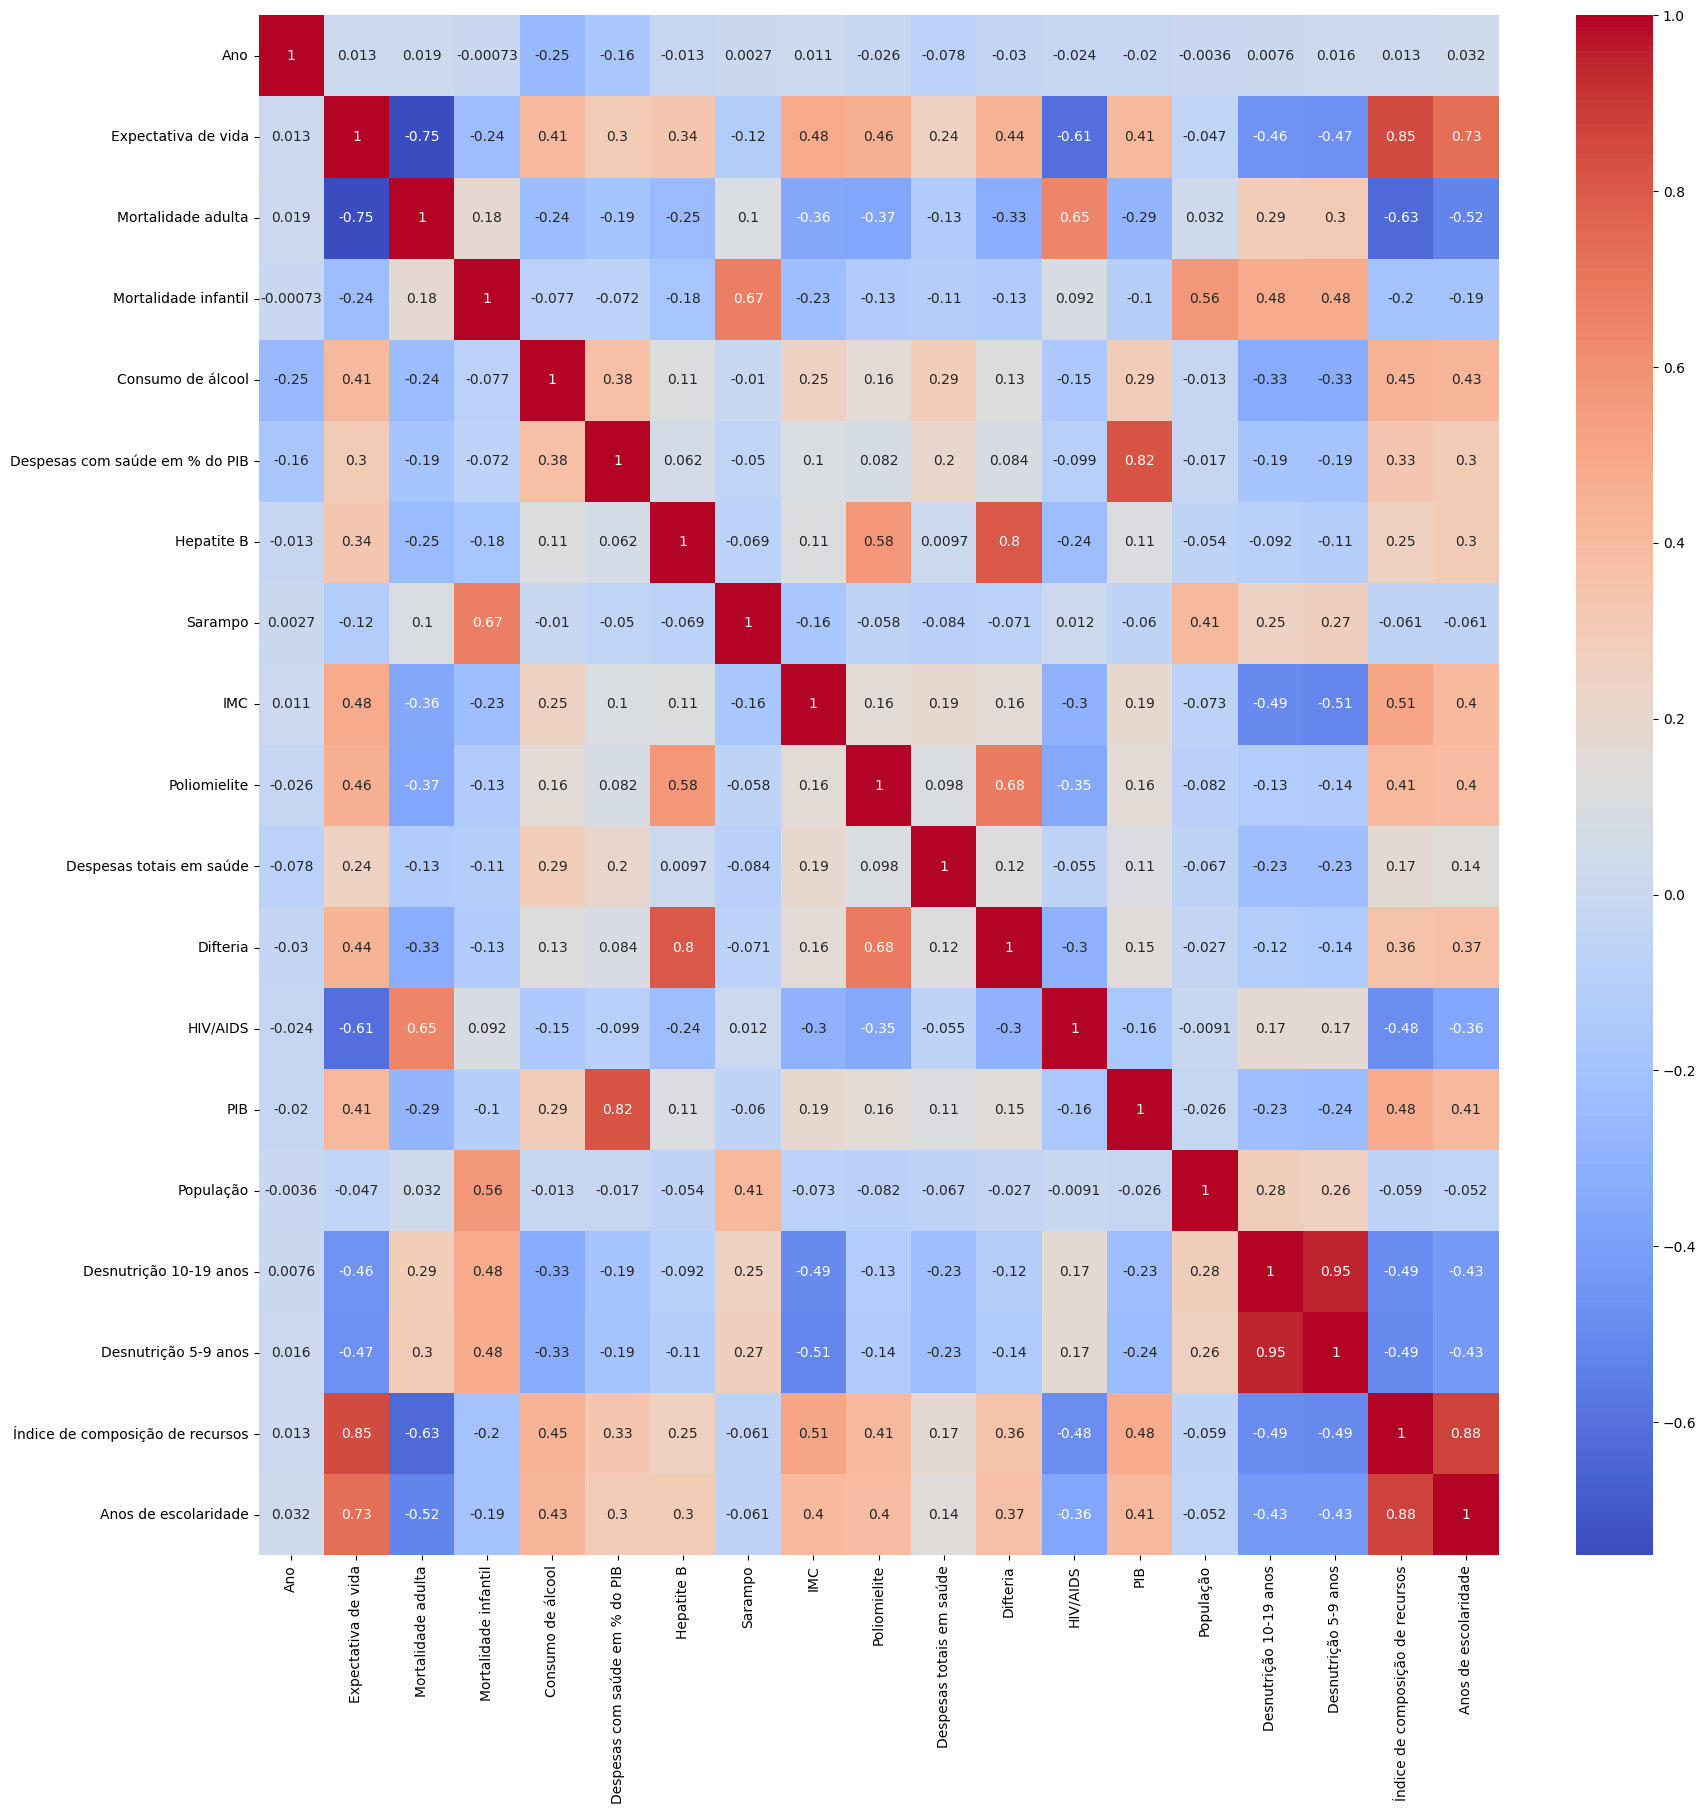

In [ ]:
ax = plt.subplots(figsize= (20, 20))
sns.heatmap(who_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
who_df[["Desnutrição 5-9 anos", "Desnutrição 10-19 anos"]].corr()

,Desnutrição 5-9 anos,Desnutrição 10-19 anos
Desnutrição 5-9 anos,1.0000,0.9494
Desnutrição 10-19 anos,0.9494,1.0000


In [ ]:
who_df['Desnutrição 5-19 anos'] = pd.concat([who_df['Desnutrição 5-9 anos'], who_df['Desnutrição 10-19 anos']], axis=1).mean(axis=1)
who_df.drop(columns=['Desnutrição 5-9 anos', 'Desnutrição 10-19 anos'], inplace=True)
who_df

,País,Ano,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Índice de composição de recursos,Anos de escolaridade,Desnutrição 5-19 anos
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1,17.25
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0,17.50
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9,17.70
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,99.0,6.00,99.0,0.1,3954.227830,28873.0,0.762,14.2,1.25
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,98.0,5.88,98.0,0.1,4575.763787,288914.0,0.761,14.2,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,Zambia,2014,Developing,61.1,314.0,28,0.01,196.667577,86.0,9,22.8,78.0,4.99,86.0,4.3,1738.882200,1562974.0,0.570,12.5,6.25
2908,Zambia,2013,Developing,63.0,328.0,29,2.41,20.623063,79.0,35,22.3,74.0,4.99,79.0,4.8,185.793359,1515321.0,0.565,12.5,6.30
2922,Zimbabwe,2015,Developing,67.0,336.0,22,1.57,0.000000,87.0,0,31.8,88.0,5.93,87.0,6.2,118.693830,15777451.0,0.507,10.3,5.55
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,31.3,92.0,6.44,91.0,6.3,127.474620,15411675.0,0.498,10.3,5.80


As colunas desnutrição 5-9 e 10-19 anos apresentam uma correlação e proximidade de resultados muito grande quando comparadas com outras colunas, sendo assim, foi criada uma nova coluna "Desnutrição 5-19 anos" agrupando esses dados pela média.

#Remoção de colunas

In [ ]:
who_df.drop(columns=['Ano'], inplace=True)

Após a análise do heatmap, foi visualizado que a coluna ANO tem uma correlação muito baixa com as outras variáveis e também não é um fator determinante para respostas das perguntas contidas no objetivo da análise, por isso, neste momento, foi descartada.

# Análise Exploratória

##Mapa de calor

<ipython-input-34-307a1e039b62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(who_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


<Axes: >

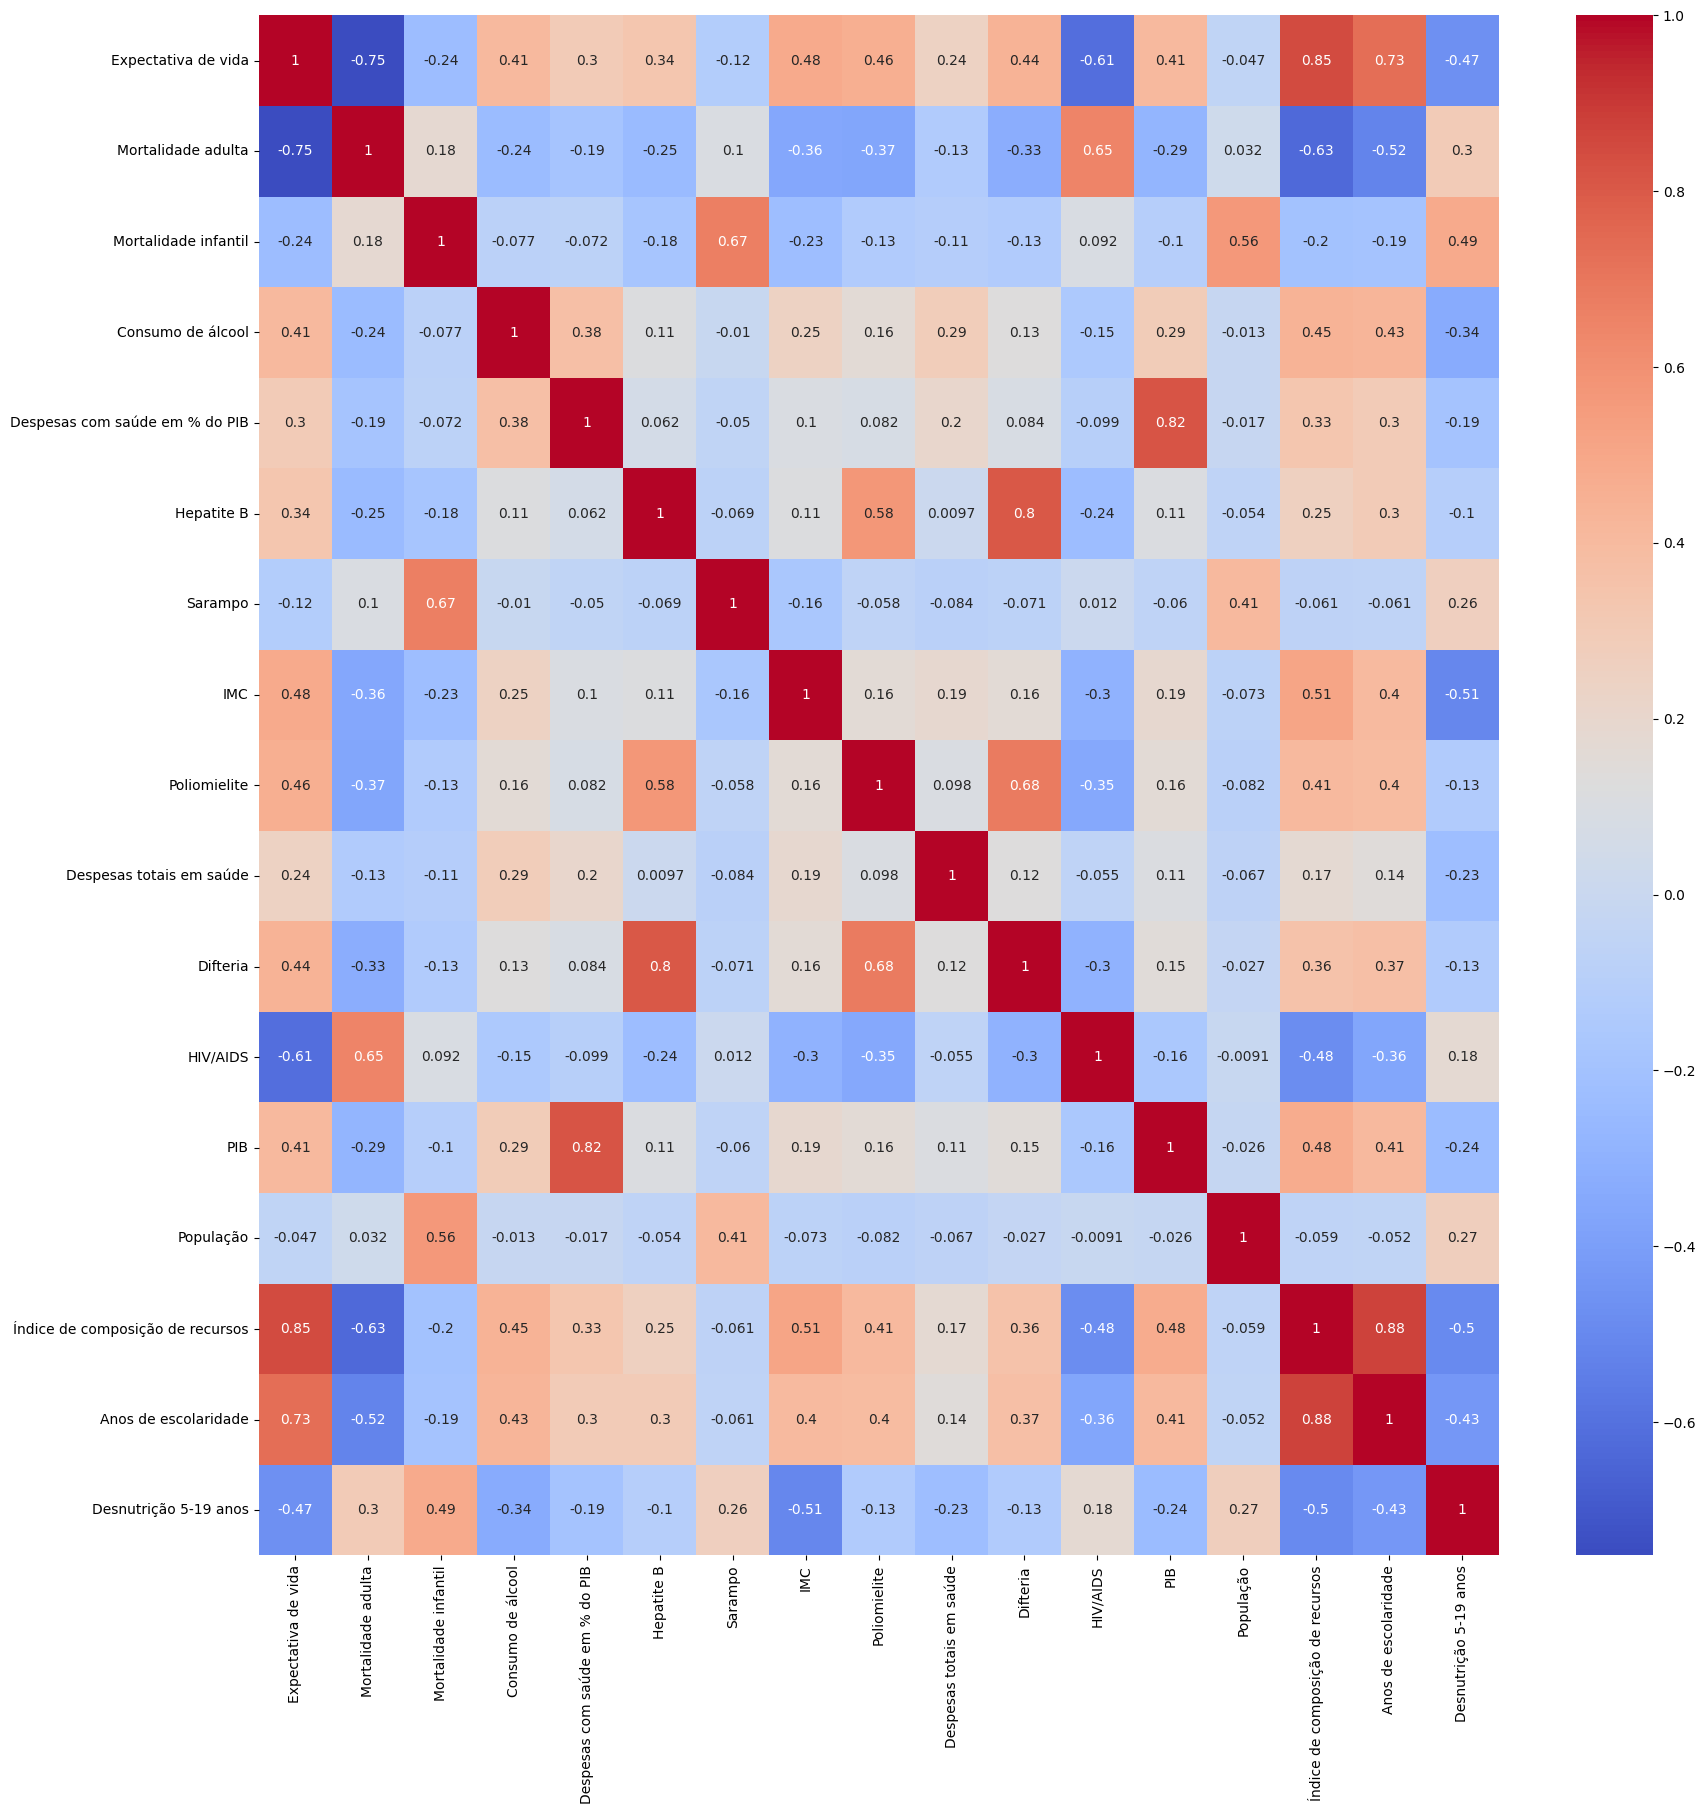

In [ ]:
ax = plt.subplots(figsize= (20, 20))
sns.heatmap(who_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

##Análise Univariada

In [ ]:
#Recupera colunas numéricas
tipos = ['float64', 'int64']
colunas_numericas = who_df.select_dtypes(include=tipos).columns
len(colunas_numericas)

17

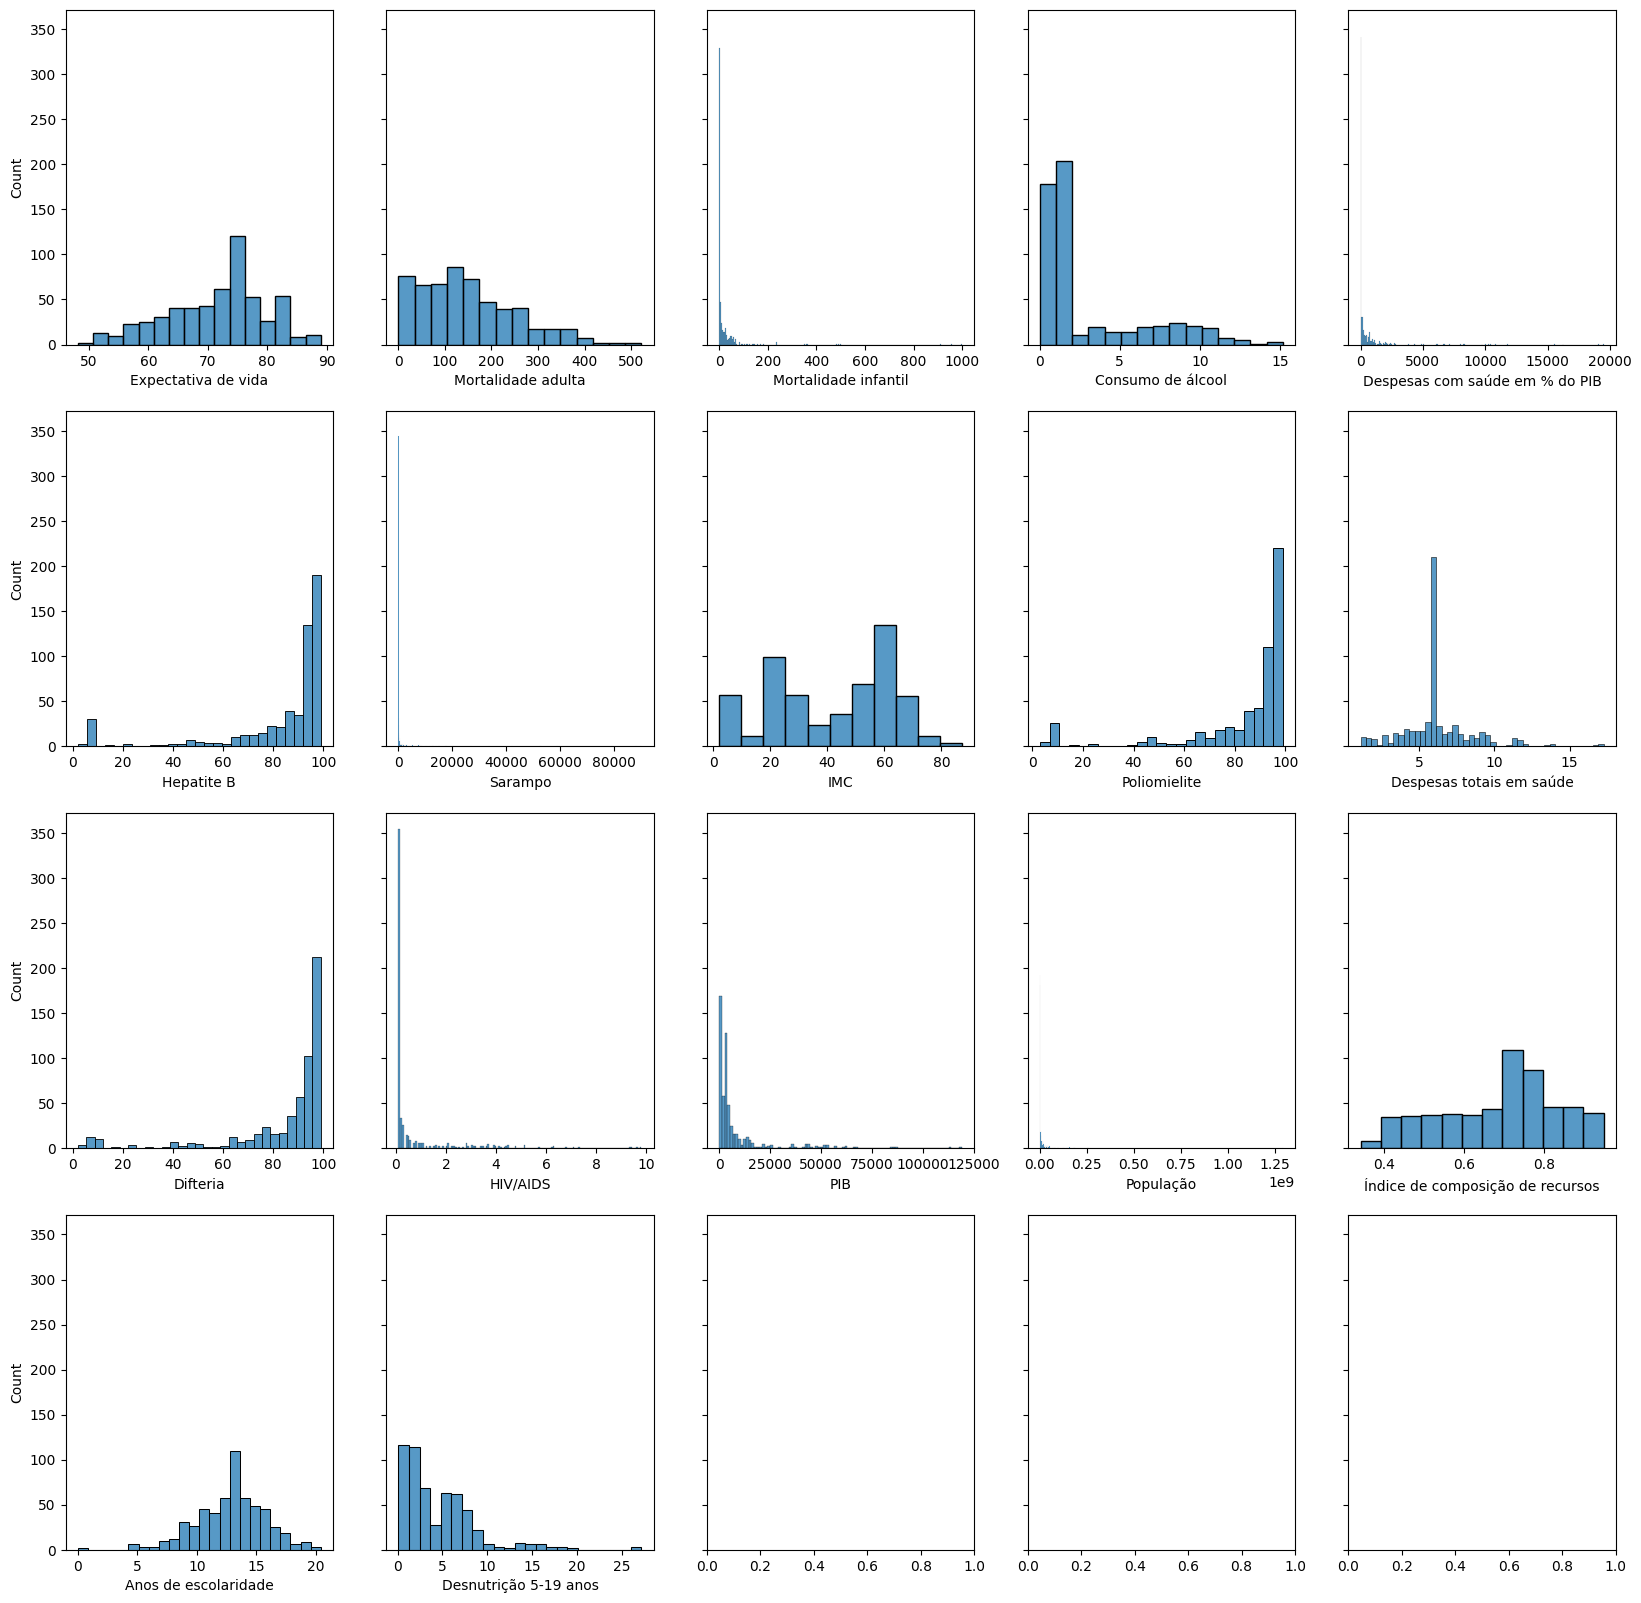

In [ ]:
#Distribuição das variáveis contínuas
n_cols = 5
n_rows = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,20), sharey=True)
for i, coluna in enumerate(colunas_numericas):
    sns.histplot(who_df[coluna],ax=axes[i//n_cols,i%n_cols]);

##Verificando o target: expectativa de vida

<Axes: title={'center': 'Expectativa de vida'}>

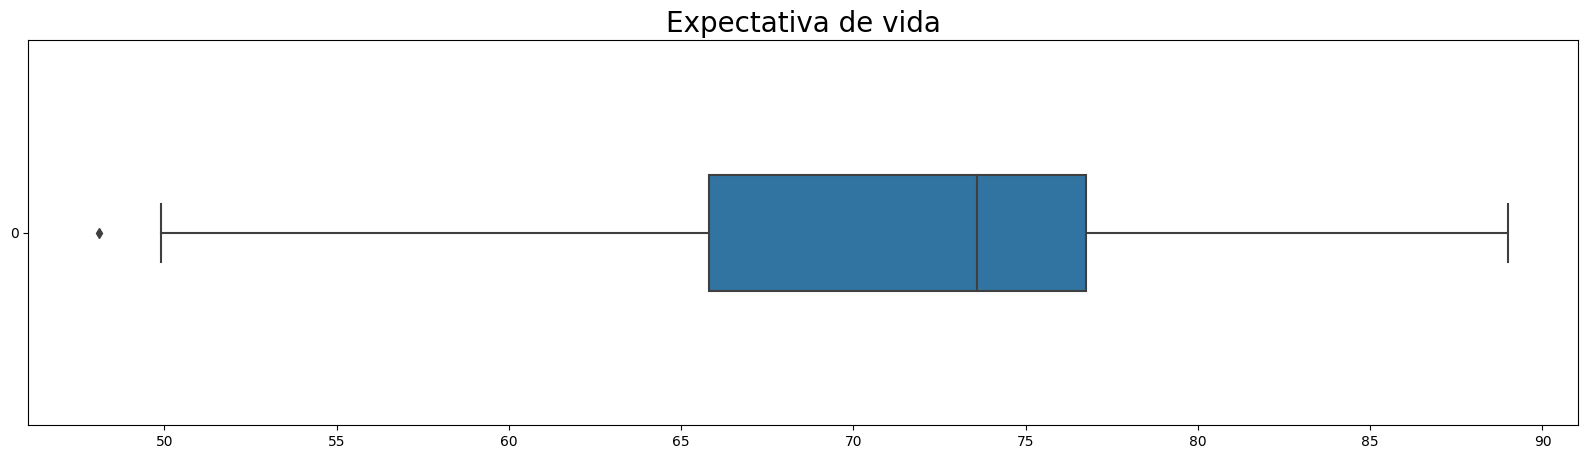

In [ ]:
ax = sns.boxplot(data=who_df['Expectativa de vida'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Expectativa de vida', fontsize=20)
ax

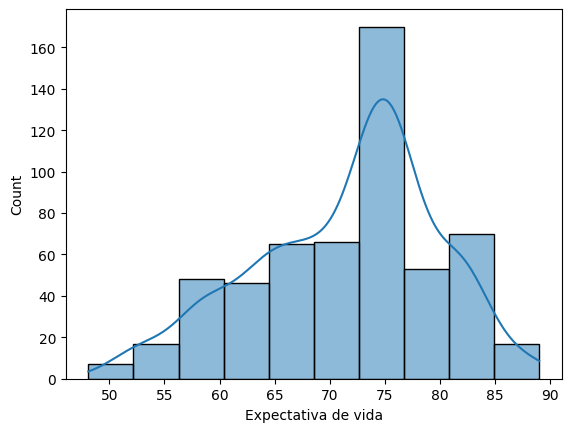

In [ ]:
sns.histplot(who_df['Expectativa de vida'], bins=10, kde=True);

Aparentemente os dados não seguem uma distribuição normal, pois, os dados no gráfico apresentam uma assimetria negativa.

In [ ]:
def teste_normalidade(dados):
  stat, p = shapiro(dados)
  print('Estatística=%.3f, p-valor=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha:
    print('A amostra parece ser normal (não podemos rejeitar H0)')
  else:
    print('A amostra não parece ser normal (rejeitamos H0)')

In [ ]:
teste_normalidade(who_df['Expectativa de vida'])

Estatística=0.972, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)


Estatística=0.952, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)


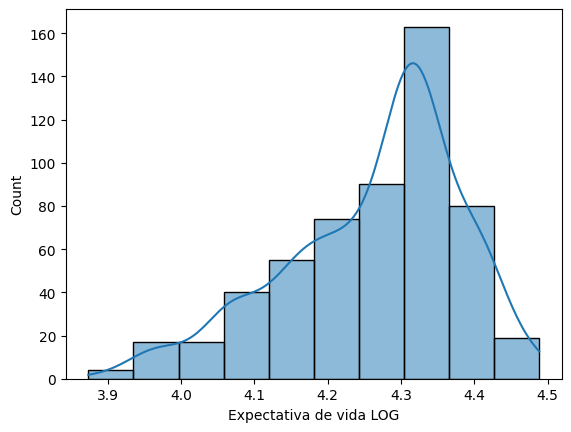

In [ ]:
# Usando LOG
who_df["Expectativa de vida LOG"] = np.log(who_df['Expectativa de vida'])
teste_normalidade(who_df["Expectativa de vida LOG"])
sns.histplot(who_df['Expectativa de vida LOG'], bins=10, kde=True);

Estatística=0.984, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)


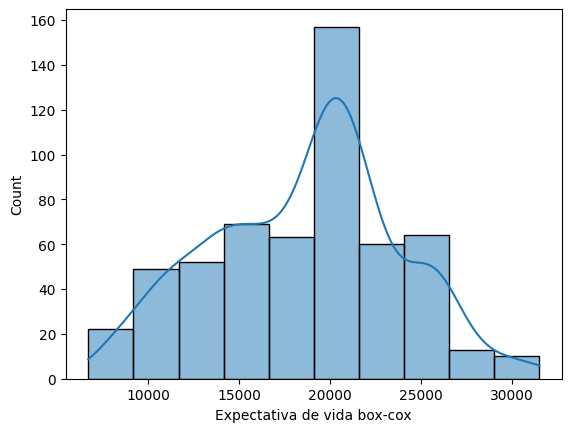

In [ ]:
# Usando box-cox
who_df["Expectativa de vida box-cox"], _ = boxcox(who_df['Expectativa de vida'])
teste_normalidade(who_df["Expectativa de vida box-cox"])
sns.histplot(who_df['Expectativa de vida box-cox'], bins=10, kde=True);

Estatística=0.963, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)


<Axes: xlabel='Expectativa de vida sqrt', ylabel='Count'>

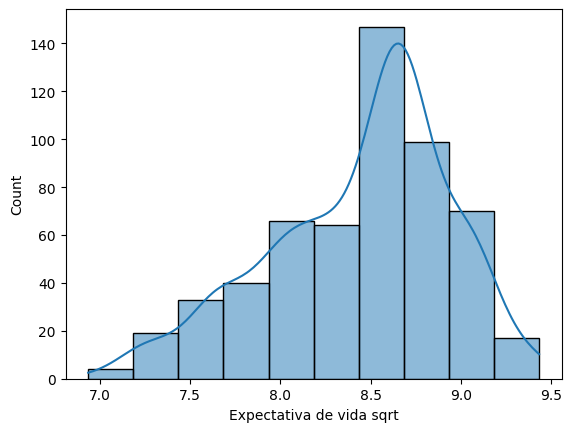

In [ ]:
# Usando raiz quadrada
who_df['Expectativa de vida sqrt'] = np.sqrt(who_df['Expectativa de vida'])
teste_normalidade(who_df['Expectativa de vida sqrt'])
sns.histplot(who_df['Expectativa de vida sqrt'], bins=10, kde=True)

Apesar de não conseguirmos normalizar o target (Expectativa de vida), vimos que o box-cox trouxe, aparentemente, um melhor resultado. Por isso, iremos remover os outros testes.

In [ ]:
who_df.drop(columns=['Expectativa de vida LOG', 'Expectativa de vida sqrt'], inplace=True)

In [ ]:
#correlação das variáveis com o target
who_df[who_df.columns].corr()['Expectativa de vida box-cox'].sort_values()

<ipython-input-45-19a61edce6a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  who_df[who_df.columns].corr()['Expectativa de vida box-cox'].sort_values()


Mortalidade adulta                 -0.732369
HIV/AIDS                           -0.576473
Desnutrição 5-19 anos              -0.482420
Mortalidade infantil               -0.234220
Sarampo                            -0.120312
População                          -0.053492
Despesas totais em saúde            0.257414
Despesas com saúde em % do PIB      0.324285
Hepatite B                          0.324583
Consumo de álcool                   0.426079
Difteria                            0.430021
PIB                                 0.432892
Poliomielite                        0.444342
IMC                                 0.473652
Anos de escolaridade                0.744847
Índice de composição de recursos    0.853614
Expectativa de vida                 0.994230
Expectativa de vida box-cox         1.000000
Name: Expectativa de vida box-cox, dtype: float64

Os atributos mais relacionados com o target (Expectativa de vida box-cox) são: mortalidade adulta, HIV/AIDS, anos de escolaridade e índice de composição de recursos.



In [ ]:
who_df

,País,Status,Expectativa de vida,Mortalidade adulta,Mortalidade infantil,Consumo de álcool,Despesas com saúde em % do PIB,Hepatite B,Sarampo,IMC,Poliomielite,Despesas totais em saúde,Difteria,HIV/AIDS,PIB,População,Índice de composição de recursos,Anos de escolaridade,Desnutrição 5-19 anos,Expectativa de vida box-cox
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1,17.25,14304.484721
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0,17.50,11649.185981
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9,17.70,11649.185981
16,Albania,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,99.0,6.00,99.0,0.1,3954.227830,28873.0,0.762,14.2,1.25,22472.364298
17,Albania,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,98.0,5.88,98.0,0.1,4575.763787,288914.0,0.761,14.2,1.25,22255.242005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,Zambia,Developing,61.1,314.0,28,0.01,196.667577,86.0,9,22.8,78.0,4.99,86.0,4.3,1738.882200,1562974.0,0.570,12.5,6.25,12244.564422
2908,Zambia,Developing,63.0,328.0,29,2.41,20.623063,79.0,35,22.3,74.0,4.99,79.0,4.8,185.793359,1515321.0,0.565,12.5,6.30,13224.041714
2922,Zimbabwe,Developing,67.0,336.0,22,1.57,0.000000,87.0,0,31.8,88.0,5.93,87.0,6.2,118.693830,15777451.0,0.507,10.3,5.55,15436.414007
2923,Zimbabwe,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,31.3,92.0,6.44,91.0,6.3,127.474620,15411675.0,0.498,10.3,5.80,11310.101998


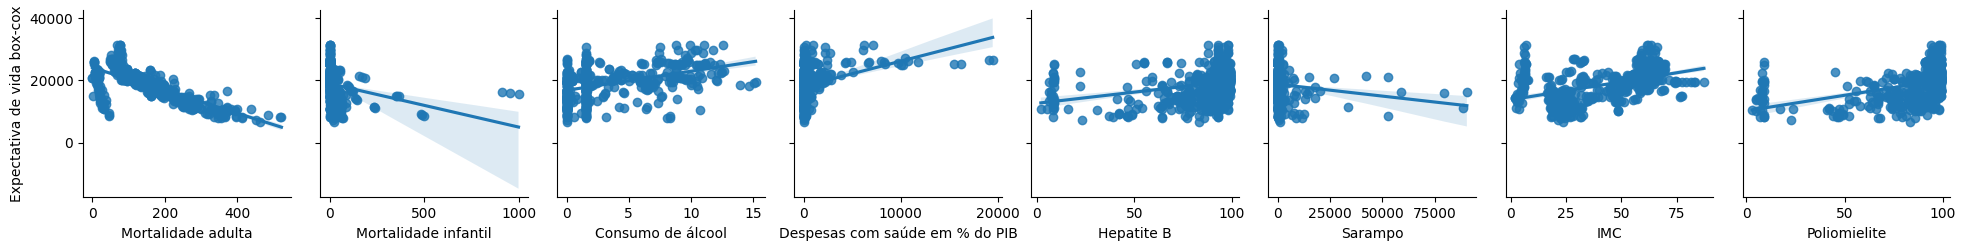

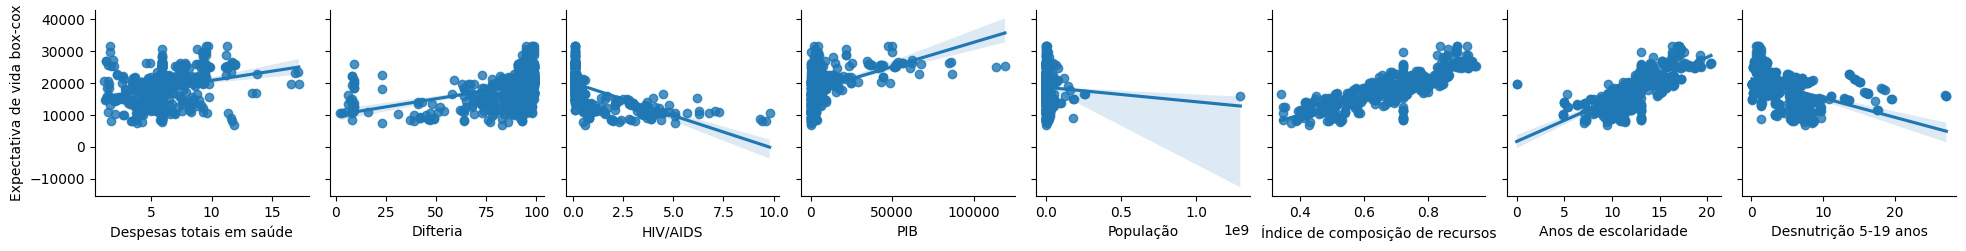

In [ ]:
sns.pairplot(data=who_df, y_vars=['Expectativa de vida box-cox'], x_vars=colunas_numericas[1:9], kind='reg')
sns.pairplot(data=who_df, y_vars=['Expectativa de vida box-cox'], x_vars=colunas_numericas[9:], kind='reg')

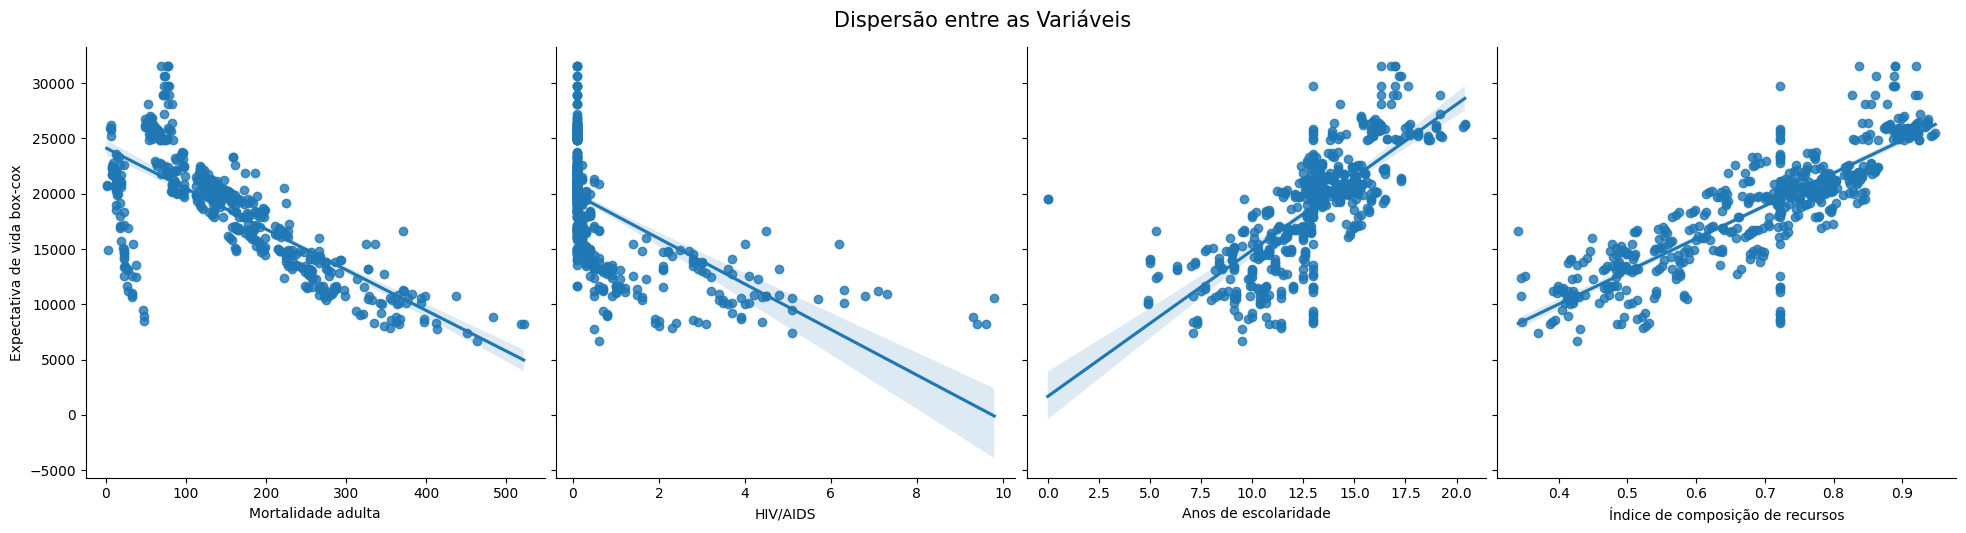

In [ ]:
# Atributos mais correlacionados com o target
ax = sns.pairplot(who_df, y_vars='Expectativa de vida box-cox', x_vars=['Mortalidade adulta', 'HIV/AIDS', 'Anos de escolaridade', 'Índice de composição de recursos'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=15, y=1.05)
ax

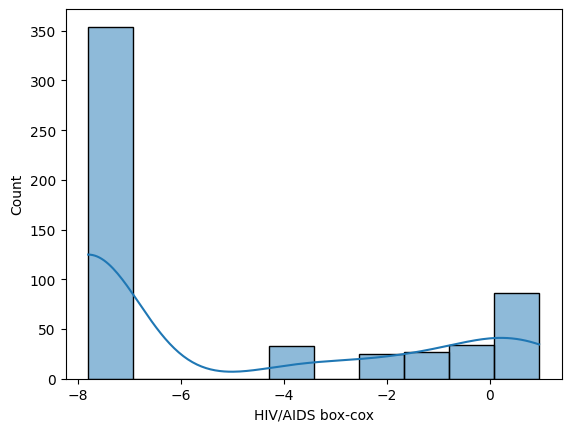

In [ ]:
# Usando box-cox
who_df["HIV/AIDS box-cox"], _ = boxcox(who_df['HIV/AIDS'])
sns.histplot(who_df['HIV/AIDS box-cox'], bins=10, kde=True);

In [ ]:
#correlação das variáveis com o target incluindo HIV/AIDS box-cox
who_df[who_df.columns].corr()['Expectativa de vida box-cox'].sort_values()

<ipython-input-50-4642263d0daf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  who_df[who_df.columns].corr()['Expectativa de vida box-cox'].sort_values()


HIV/AIDS box-cox                   -0.772486
Mortalidade adulta                 -0.732369
HIV/AIDS                           -0.576473
Desnutrição 5-19 anos              -0.482420
Mortalidade infantil               -0.234220
Sarampo                            -0.120312
População                          -0.053492
Despesas totais em saúde            0.257414
Despesas com saúde em % do PIB      0.324285
Hepatite B                          0.324583
Consumo de álcool                   0.426079
Difteria                            0.430021
PIB                                 0.432892
Poliomielite                        0.444342
IMC                                 0.473652
Anos de escolaridade                0.744847
Índice de composição de recursos    0.853614
Expectativa de vida                 0.994230
Expectativa de vida box-cox         1.000000
Name: Expectativa de vida box-cox, dtype: float64

Após ajustes na coluna HIV/AIDS os novos atributos mais relacionados com o target (Expectativa de vida box-cox) são: mortalidade adulta, HIV/AIDS box-cox, anos de escolaridade e índice de composição de recursos.

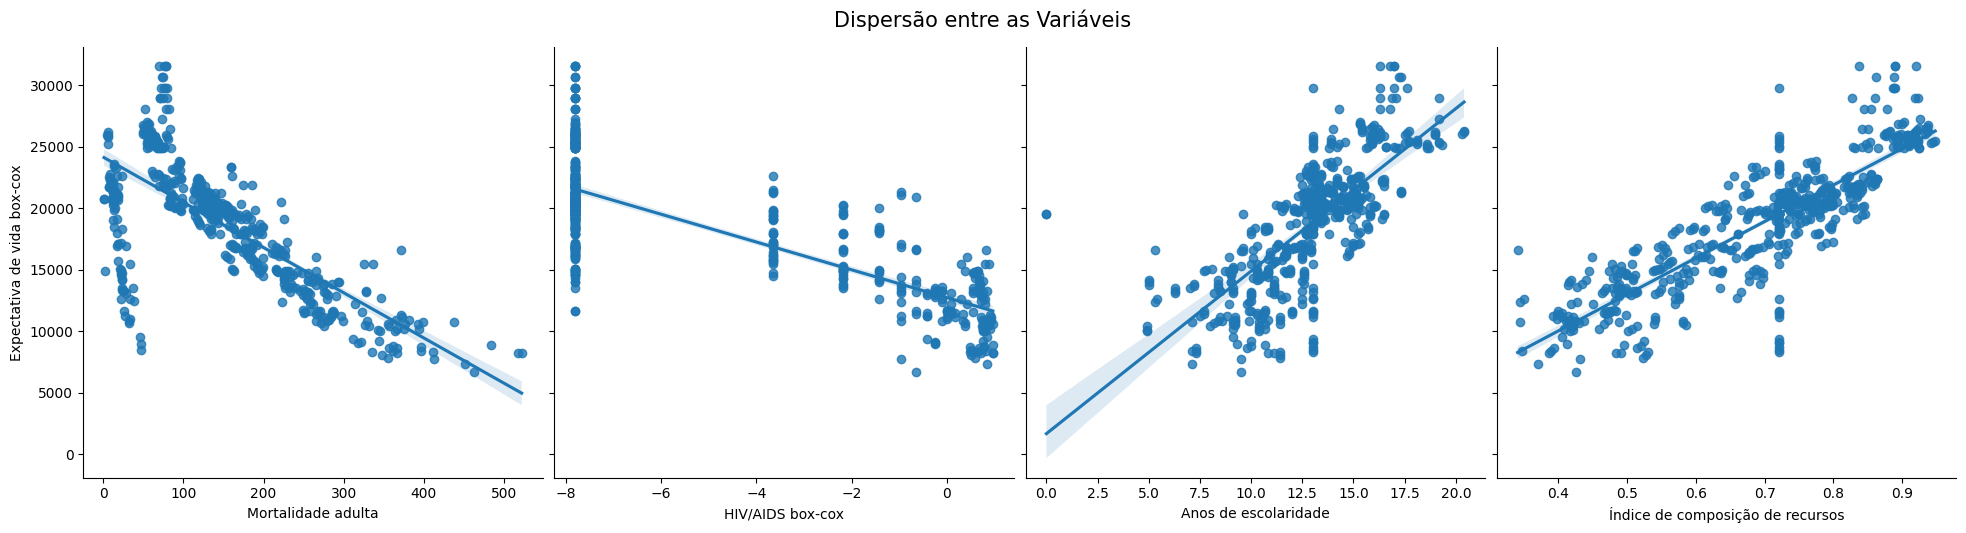

In [ ]:
# Atributos mais correlacionados com o target com ajuste da coluna HIV/AIDS
ax = sns.pairplot(who_df, y_vars='Expectativa de vida box-cox', x_vars=['Mortalidade adulta', 'HIV/AIDS box-cox', 'Anos de escolaridade', 'Índice de composição de recursos'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=15, y=1.05)
ax

#Regressão Linear Múltipla

In [ ]:
who_df.columns

Index(['País', 'Status', 'Expectativa de vida', 'Mortalidade adulta',
       'Mortalidade infantil', 'Consumo de álcool',
       'Despesas com saúde em % do PIB', 'Hepatite B', 'Sarampo', 'IMC',
       'Poliomielite', 'Despesas totais em saúde', 'Difteria', 'HIV/AIDS',
       'PIB', 'População', 'Índice de composição de recursos',
       'Anos de escolaridade', 'Desnutrição 5-19 anos',
       'Expectativa de vida box-cox', 'HIV/AIDS box-cox'],
      dtype='object')

In [ ]:
X = who_df[['Mortalidade adulta', 'Mortalidade infantil', 'Consumo de álcool', 
  'Despesas com saúde em % do PIB', 'Hepatite B', 'Sarampo', 'IMC', 'Poliomielite', 
  'Despesas totais em saúde', 'Difteria', 'PIB', 'População', 
  'Índice de composição de recursos', 'Anos de escolaridade', 
  'Desnutrição 5-19 anos', 'HIV/AIDS box-cox']]
y = who_df['Expectativa de vida box-cox']
X_com_constante = sm.add_constant(X)

modelo_statsmodels_multi_1 = sm.OLS(y, X_com_constante, hasconst = True).fit()
print(modelo_statsmodels_multi_1.summary())

                                 OLS Regression Results                                
Dep. Variable:     Expectativa de vida box-cox   R-squared:                       0.839
Model:                                     OLS   Adj. R-squared:                  0.835
Method:                          Least Squares   F-statistic:                     177.2
Date:                         Tue, 18 Apr 2023   Prob (F-statistic):          3.39e-203
Time:                                 14:15:42   Log-Likelihood:                -5057.6
No. Observations:                          559   AIC:                         1.015e+04
Df Residuals:                              542   BIC:                         1.022e+04
Df Model:                                   16                                         
Covariance Type:                     nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

A partir da primeira análise notamos: 
- R-squared elevado, com quase 90%.
- Alguns coeficientes onde p-valor indica que não são estaticamente diferentes de 0.
- Os testes de Omnibus e Jarque-Bera indicam que os resíduos não seguem uma distribuição normal, conforme histograma abaixo.

<Axes: ylabel='Count'>

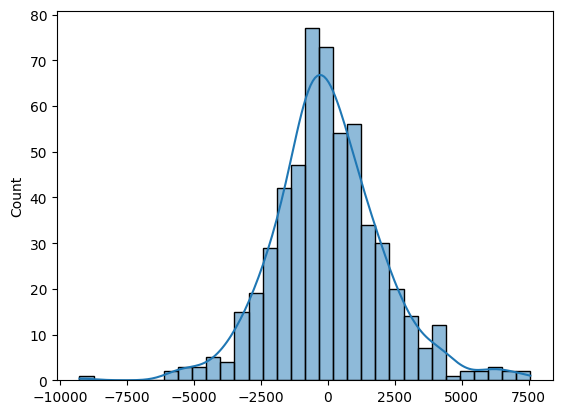

In [ ]:
sns.histplot(modelo_statsmodels_multi_1.resid, kde=True)

Modelo com todas as variáveis cujo teste T indique atributos estaticamentes diferentes de 0.

In [ ]:
X = who_df[['Mortalidade adulta', 'Consumo de álcool', 'Despesas totais em saúde', 
            'Difteria', 'Índice de composição de recursos', 'Desnutrição 5-19 anos', 
            'HIV/AIDS box-cox']]
y = who_df['Expectativa de vida box-cox']
X_com_constante = sm.add_constant(X)

modelo_statsmodels_multi_2 = sm.OLS(y, X_com_constante, hasconst = True).fit()
print(modelo_statsmodels_multi_2.summary())

                                 OLS Regression Results                                
Dep. Variable:     Expectativa de vida box-cox   R-squared:                       0.835
Model:                                     OLS   Adj. R-squared:                  0.833
Method:                          Least Squares   F-statistic:                     398.6
Date:                         Tue, 18 Apr 2023   Prob (F-statistic):          5.53e-211
Time:                                 14:15:43   Log-Likelihood:                -5065.2
No. Observations:                          559   AIC:                         1.015e+04
Df Residuals:                              551   BIC:                         1.018e+04
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

Esse novo modelo mantém o R-squared similar ao anterior, com um AIC mantido e BIC menor, indicando que a redução da complexidade do modelo foi realizada sem prejuízo relevante ao aprendizado.

Apesar do modelo indicar um bom resultado, os testes Omnibus e Jarque-Bera indicam que a hipótese nula pode ser rejeitada e a distribuição de dados não é normal.

<Axes: ylabel='Count'>

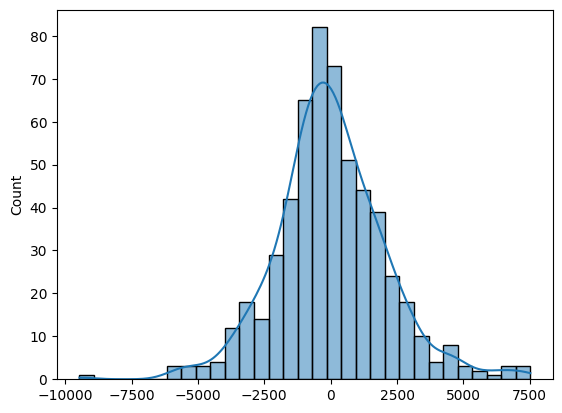

In [ ]:
sns.histplot(modelo_statsmodels_multi_2.resid, kde=True)

In [ ]:
coef_df = pd.DataFrame(data=modelo_statsmodels_multi_2.params, index=list(X_com_constante.columns), columns=['Statsmodels'])
coef_df

,Statsmodels
const,5513.932254
Mortalidade adulta,-11.970164
Consumo de álcool,77.583460
Despesas totais em saúde,169.112262
Difteria,21.048746
Índice de composição de recursos,15403.383542
Desnutrição 5-19 anos,-93.886776
HIV/AIDS box-cox,-312.569876


Com base nessas análises, verificamos que:

- O R-squared está em um patamar elevado (0.835);
- O p-valor dos coeficiente e do intercepto indicam que eles são estatísticamente diferentes de zero;
- O teste de Durbin-Watson indica que não temos autocorrelação entre os resíduos;
- Os testes Omnibus e Jarque-Bera concordam que os resíduos não seguem uma distribuição normal.

Resta agora verificar os resíduos.

Text(0.5, 0, 'Predito')

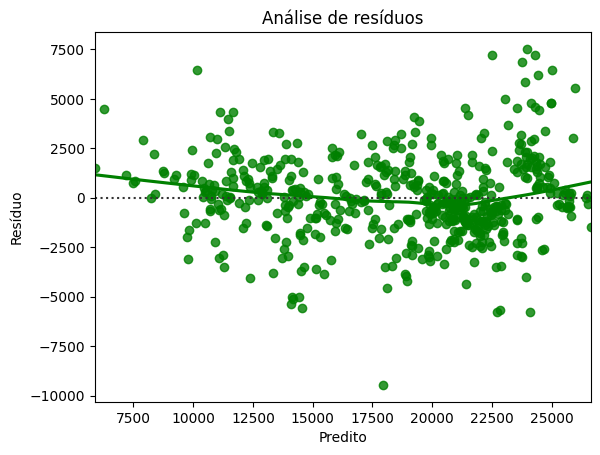

In [ ]:
ax_residual = sns.residplot(x=modelo_statsmodels_multi_2.predict(), y=modelo_statsmodels_multi_2.resid, lowess=True, color="g")
ax_residual.set_title("Análise de resíduos")
plt.ylabel('Resíduo')
plt.xlabel('Predito')

A partir do gráfico acima é possível notar um possível padrão nos resíduos, e também é possível perceber que os resíduos estão, em grande parte, distribuídos ao redor de zero.

In [ ]:
# Teste de Breusch-Pagan para verificar homocedasticidade dos resíduos
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(modelo_statsmodels_multi_2.resid, modelo_statsmodels_multi_2.model.exog)

# Teste de white
resultado_teste_white = smd.het_white(modelo_statsmodels_multi_2.resid, modelo_statsmodels_multi_2.model.exog)

# Imprime o valor-p associado ao teste
print('Valor-p do teste de Breusch-Pagan:', p_value)
print('Valor-p do teste de White:', resultado_teste_white[1])


Valor-p do teste de Breusch-Pagan: 0.0006487236276393321
Valor-p do teste de White: 3.1719167527570178e-06


Como o p-valor dos testes foram contrários (um inferior a 0,05 e outro superior), isso nos permite afirmar que pode existir uma heterocedasticidade relevante nos resíduos.

# Respondendo as principais questões

1. Quais são as variáveis que realmente afetam a expectativa de vida?
2. Um país com expectativa de vida menor (<65) deve aumentar seus investimentos em saúde a fim de melhorar sua expectativa de vida média?
3. Como as taxas de mortalidade infantil e de adultos afetam a expectativa de vida?
4. A expectativa de vida tem correlação positiva ou negativa com hábitos alimentares, estilo de vida, exercícios, fumo, consumo de álcool etc.
5. Qual é o impacto da escolaridade na expectativa de vida dos humanos?
6. A expectativa de vida tem uma relação positiva ou negativa com o consumo de álcool?
7. Países densamente povoados tendem a ter menor expectativa de vida?
8. Qual é o impacto da cobertura de imunização na expectativa de vida?

## Respostas

1. Através do modelo de regressão linear utilizando o método OLS(), observamos que o consumo de álcool, despesas com saúde e doenças como a Difteria e HIV/AIDS, são atributos que se mostraram significantes em nosso modelo e possuem capacidade de afetar a expectativa de vida das pessoas. 

2. Observando como a expectativa de vida se relaciona com os investimentos em saúde:

<function matplotlib.pyplot.show(close=None, block=None)>

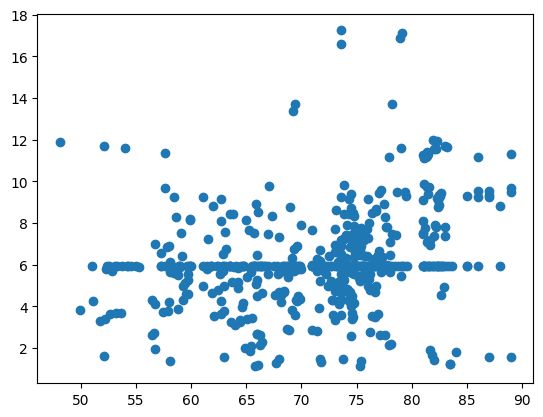

In [ ]:
expec_vida = who_df['Expectativa de vida'].tolist()
gasto_saude = who_df['Despesas totais em saúde'].tolist()

plt.scatter(expec_vida, gasto_saude)
plt.show

3. As correlações entre a taxa de mortalidade infantil e a taxa de mortalidade adulta e a expectativa de vida são as seguintes:

Mortalidade de infantil e expectativa de vida: -0.234220

Mortalidade adulta e expectativa de vida: -0.732369

Observa-se que as correlações das mortalidades e a expectativa de vida são negativas. Onde nos diz que se a taxa de mortalidade (adulta ou infantil) diminui a expectativa de vida aumenta, o que é bastante intuitivo.

4. A correlação entre a expectativa de vida e o consumo de álcool é de: 0.426079. Onde podemos inferir que o consumo de álcool afeta até um certo momento.

5. Observando a relação entre escolaridade e expectativa de vida:

<function matplotlib.pyplot.show(close=None, block=None)>

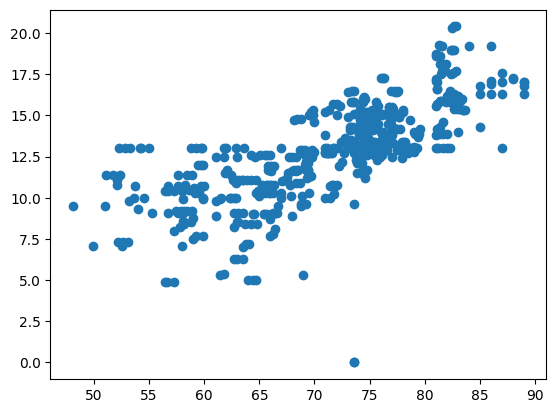

In [ ]:
escola = who_df['Anos de escolaridade'].tolist()

plt.scatter(expec_vida, escola)
plt.show

Podemos observar que a escolaridade tem uma correlação direta com a expectativa de vida, e como já visto possui um coeficiente de correlação de 0.744847. O que nos diz que a escolaridade contribui para uma boa expectativa de vida do indivíduo.

6. A expectativa de vida tem uma correlação positiva direta com o consumo de álcool com um coeficiente de correlação de 0.426079.

7. O coeficiente de correlação da população de um país e a expectativa de vida é de -0,053492. O que nos diz que se a população aumenta, a expectativa de vida diminui. Essa relação pode ser devido ao fato de que com o aumento da população pode resultar numa sobrecarga na capacidade do sistema de saúde, podendo falhar por causa disso.